In [1]:
from wfuzz.plugins.scripts.title import title

"""
Exploracion inicial de los datos
"""
#importacion de librerias
import pandas as pd

path_USD_EUR = "../data/raw/USD_EUR Historical Data.csv"
df_USD_EUR = pd.read_csv(path_USD_EUR)
print(df_USD_EUR.head())

         Date   Price    Open    High     Low Vol. Change %
0  11/24/2024  0.9553  0.9540  0.9556  0.9540  NaN   -0.44%
1  11/22/2024  0.9595  0.9547  0.9677  0.9526  NaN    0.51%
2  11/21/2024  0.9546  0.9487  0.9558  0.9474  NaN    0.66%
3  11/20/2024  0.9483  0.9439  0.9517  0.9425  NaN    0.49%
4  11/19/2024  0.9437  0.9435  0.9502  0.9433  NaN    0.04%


In [2]:
#informacion del df y sus tipos  de datos
df_USD_EUR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      3887 non-null   object 
 1   Price     3887 non-null   float64
 2   Open      3887 non-null   float64
 3   High      3887 non-null   float64
 4   Low       3887 non-null   float64
 5   Vol.      1062 non-null   object 
 6   Change %  3887 non-null   object 
dtypes: float64(4), object(3)
memory usage: 212.7+ KB


# observaciones
- Date es un objet, se convertira a datetime para facilitar el analisis temporar
- price,open,high y low son flotantes, tipo correcto de datos
- Vol. es un object, cadena, tiene una gran cantidad de datos nulos, es posible que sea necesario hacerlo flotante
- Change % es object, se convertira a flotante

In [9]:
#resumen estadistico
df_USD_EUR.describe(include="all")

,Date,Price,Open,High,Low,Change %
count,3887,3887.000000,3887.000000,3887.000000,3887.000000,3887.000000
mean,2017-06-13 23:59:37.772060672,0.846977,0.846937,0.850405,0.843605,0.000094
min,2010-01-01 00:00:00,0.674400,0.674400,0.675500,0.669200,-0.029500
25%,2013-09-23 12:00:00,0.772450,0.772500,0.775150,0.769200,-0.002900
50%,2017-06-14 00:00:00,0.863500,0.863400,0.866700,0.860800,0.000000
75%,2021-03-04 12:00:00,0.910050,0.909950,0.913750,0.906500,0.003100
max,2024-11-24 00:00:00,1.042100,1.042300,1.048700,1.033900,0.026700
std,NaN,0.077854,0.077930,0.078094,0.077632,0.005264


In [3]:
# Primero se procedera a ajustar los datos de Vol.
df_USD_EUR["Vol."] = (
    df_USD_EUR["Vol."]
    .str.replace("K", "")
    .str.replace(",", "")
    .astype(float)
    * 1000
)

In [4]:
#debido a los pocos datos de Vol de opta por eliminar estos datos
df_USD_EUR.drop(columns=["Vol."], inplace=True)

In [6]:
#procedo a convertir los demas datos en el tipo correcto
#primero quitar el % de Change % y dejarlo como flotante
df_USD_EUR["Change %"] = (
    df_USD_EUR["Change %"].str.replace("%", "").astype(float) / 100
)
#ahora convierto el Date en fecha
df_USD_EUR["Date"] = pd.to_datetime(df_USD_EUR["Date"])

AttributeError: Can only use .str accessor with string values!

In [7]:
print(df_USD_EUR.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


In [8]:
print(df_USD_EUR.duplicated().sum())

0


# Pasos siguientes
Ahora hare un analisis temporal de los datos
y algunos graficos

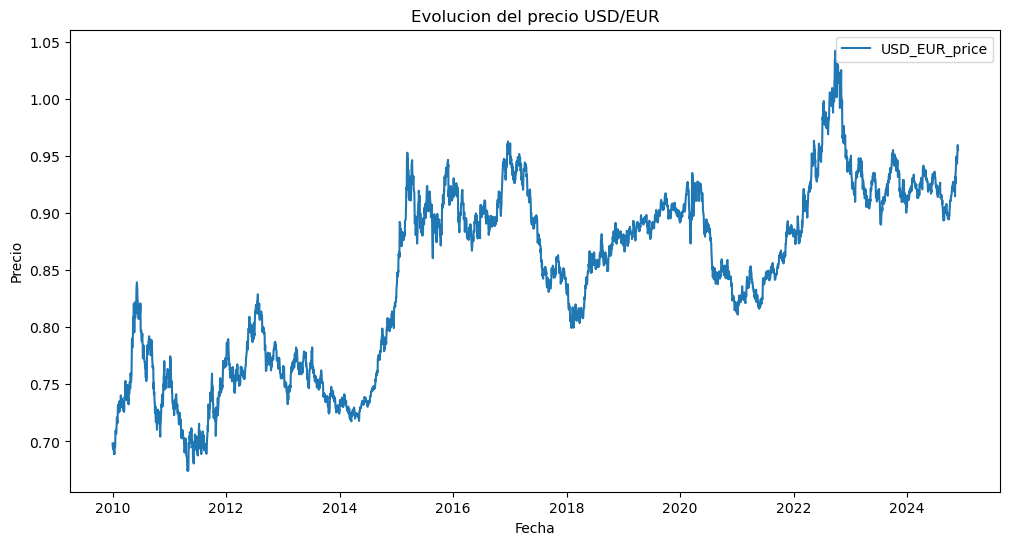

In [10]:
import matplotlib.pyplot as plt
#grafica de los precios a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(df_USD_EUR["Date"], df_USD_EUR["Price"], label="USD_EUR_price")
plt.title("Evolucion del precio USD/EUR")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.show()

In [11]:
#en la grafica anterior se observa una tendencia alcista general aunque con grandes fluctuaciones
#ahora hare una grafica de la volatilidad Change %
#primero identificare los dias con campos atipcos
outliers = df_USD_EUR[abs(df_USD_EUR["Change %"]) > df_USD_EUR["Change %"].std()]
print(outliers)

           Date   Price    Open    High     Low  Change %
2    2024-11-21  0.9546  0.9487  0.9558  0.9474    0.0066
5    2024-11-18  0.9433  0.9492  0.9497  0.9428   -0.0056
8    2024-11-13  0.9465  0.9414  0.9473  0.9386    0.0055
10   2024-11-11  0.9383  0.9334  0.9409  0.9321    0.0058
11   2024-11-08  0.9329  0.9255  0.9357  0.9254    0.0081
...         ...     ...     ...     ...     ...       ...
3876 2010-01-15  0.6951  0.6895  0.6975  0.6890    0.0083
3880 2010-01-11  0.6890  0.6927  0.6941  0.6869   -0.0068
3881 2010-01-08  0.6937  0.6983  0.7011  0.6924   -0.0069
3882 2010-01-07  0.6985  0.6940  0.6994  0.6921    0.0068
3885 2010-01-04  0.6937  0.6979  0.7015  0.6916   -0.0063

[1011 rows x 6 columns]


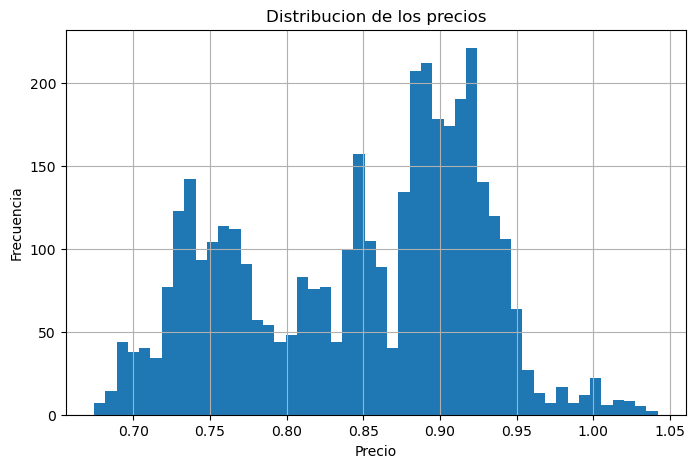

In [12]:
#creo un histograma para entender la frecuencia de los precios
df_USD_EUR["Price"].hist(bins=50, figsize=(8, 5))
plt.title("Distribucion de los precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

In [23]:
#agregare algunas columnas adicionales como el mes o el dia del año

In [13]:
df_USD_EUR["Year"] = df_USD_EUR["Date"].dt.year
df_USD_EUR["Month"] = df_USD_EUR["Date"].dt.month

In [14]:
print(df_USD_EUR.head())

        Date   Price    Open    High     Low  Change %  Year  Month
0 2024-11-24  0.9553  0.9540  0.9556  0.9540   -0.0044  2024     11
1 2024-11-22  0.9595  0.9547  0.9677  0.9526    0.0051  2024     11
2 2024-11-21  0.9546  0.9487  0.9558  0.9474    0.0066  2024     11
3 2024-11-20  0.9483  0.9439  0.9517  0.9425    0.0049  2024     11
4 2024-11-19  0.9437  0.9435  0.9502  0.9433    0.0004  2024     11


/home/cacp/.local/lib/python3.11/site-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


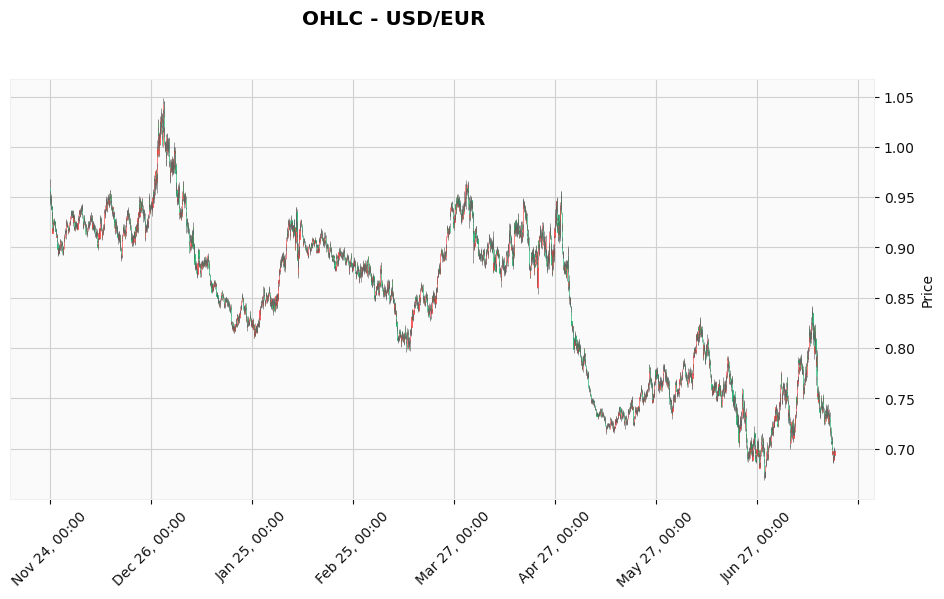

In [16]:
#ahora hare un grafico de velas
df_plot = df_USD_EUR[["Date","Open","High","Low","Price"]].copy()
df_plot.rename(columns={"Price":"Close"}, inplace=True)
df_plot.set_index("Date", inplace=True)
import mplfinance as mpf
mpf.plot(df_plot, type="candle", volume=False, style="yahoo",title="OHLC - USD/EUR", figsize=(12, 6))



# Vamos a proceder a indentificar algunos datos importante


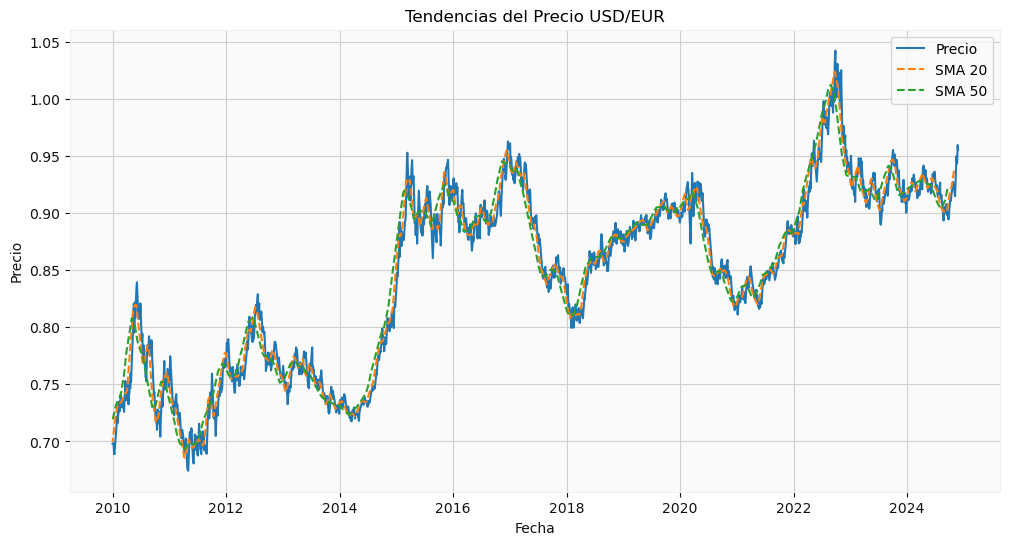

In [17]:
#media movil
df_USD_EUR["SMA_20"] = df_USD_EUR["Price"].rolling(window=20).mean()
df_USD_EUR["SMA_50"] = df_USD_EUR["Price"].rolling(window=50).mean()
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(df_USD_EUR['Date'], df_USD_EUR['Price'], label='Precio')
plt.plot(df_USD_EUR['Date'], df_USD_EUR['SMA_20'], label='SMA 20', linestyle='--')
plt.plot(df_USD_EUR['Date'], df_USD_EUR['SMA_50'], label='SMA 50', linestyle='--')
plt.title('Tendencias del Precio USD/EUR')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()

<AxesSubplot: title={'center': 'Promedio Mensual del Precio USD/EUR'}, xlabel='Month'>

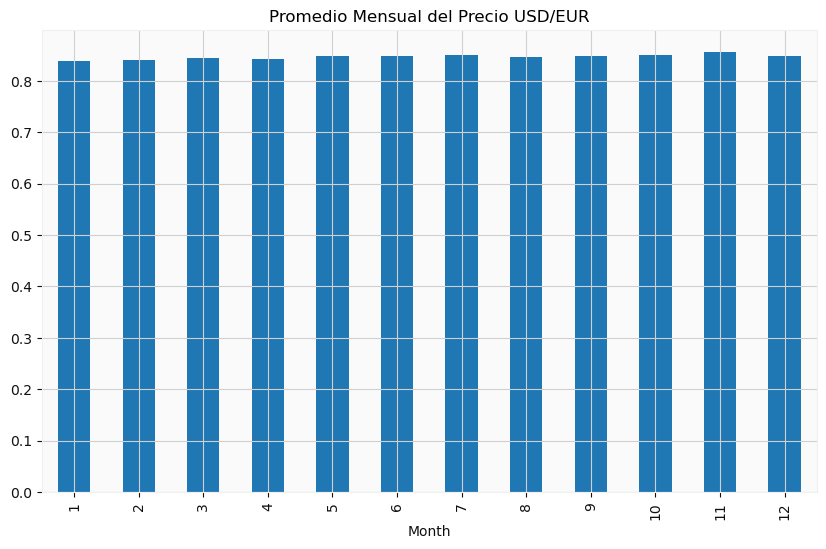

In [18]:
df_USD_EUR['Month'] = df_USD_EUR['Date'].dt.month
monthly_avg = df_USD_EUR.groupby('Month')['Price'].mean()
monthly_avg.plot(kind='bar', title='Promedio Mensual del Precio USD/EUR', figsize=(10, 6))

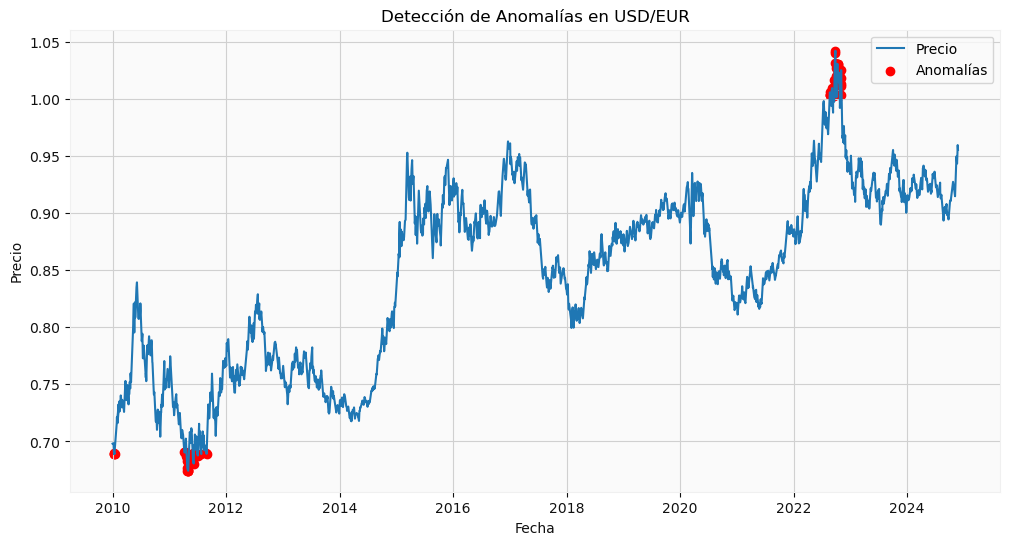

In [19]:
std_dev = df_USD_EUR['Price'].std()
mean_price = df_USD_EUR['Price'].mean()

df_USD_EUR['Anomaly'] = (df_USD_EUR['Price'] > mean_price + 2 * std_dev) | \
                        (df_USD_EUR['Price'] < mean_price - 2 * std_dev)

anomalies = df_USD_EUR[df_USD_EUR['Anomaly']]

# Graficar anomalías
plt.figure(figsize=(12, 6))
plt.plot(df_USD_EUR['Date'], df_USD_EUR['Price'], label='Precio')
plt.scatter(anomalies['Date'], anomalies['Price'], color='red', label='Anomalías')
plt.title('Detección de Anomalías en USD/EUR')
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.legend()
plt.show()


In [21]:
threshold = df_USD_EUR['Change %'].std() * 2
extreme_changes = df_USD_EUR[abs(df_USD_EUR['Change %']) > threshold]

print(extreme_changes)  # Detalles de las anomalías
print(extreme_changes[extreme_changes["Anomaly"] == True])

           Date   Price    Open    High     Low  Change %  Year  Month  \
13   2024-11-06  0.9320  0.9148  0.9362  0.9143    0.0189  2024     11   
81   2024-08-02  0.9164  0.9269  0.9275  0.9152   -0.0110  2024      8   
163  2024-04-10  0.9308  0.9211  0.9321  0.9201    0.0108  2024      4   
247  2023-12-14  0.9095  0.9197  0.9198  0.9083   -0.0108  2023     12   
269  2023-11-14  0.9191  0.9347  0.9353  0.9184   -0.0166  2023     11   
...         ...     ...     ...     ...     ...       ...   ...    ...   
3828 2010-03-24  0.7512  0.7408  0.7515  0.7405    0.0144  2010      3   
3853 2010-02-17  0.7350  0.7263  0.7360  0.7250    0.0118  2010      2   
3854 2010-02-16  0.7264  0.7353  0.7360  0.7256   -0.0121  2010      2   
3862 2010-02-04  0.7284  0.7200  0.7285  0.7191    0.0122  2010      2   
3873 2010-01-20  0.7093  0.6996  0.7103  0.6993    0.0142  2010      1   

        SMA_20    SMA_50  Anomaly  
13         NaN       NaN    False  
81    0.906190  0.904300    False  
163